# Load NEURON

In [1]:
from neuron import h

In [2]:
# load some unit definitions
from neuron.units import ms, mV

In [3]:
# load standard run library -> high level simulation control functions
h.load_file('stdrun.hoc')

1.0

In [4]:
# only for learning in Jupyter
# we should allow interactive graphics inline -> explore our PlotShapes interactively
%matplotlib notebook

# Defining the cell morphology

## Create the sections

In [5]:
class BallAndStick:
    
    def __init__(self):
        self.soma = h.Section(name='soma', cell=self)
        self.dend = h.Section(name='dend', cell=self)

In [6]:
h.topology()

1.0

In [7]:
# no sections -> we haven't actually created such cells yet

In [8]:
# create 1st cell
my_cell = BallAndStick()

In [9]:
h.topology()


|-|       <__main__.BallAndStick object at 0x7feb04201c40>.soma(0-1)
|-|       <__main__.BallAndStick object at 0x7feb04201c40>.dend(0-1)



1.0

In [10]:
class BallAndStick:
    
    def __init__(self):
        self.soma = h.Section(name='soma', cell=self)
        self.dend = h.Section(name='dend', cell=self)
    
    def __repr__(self):
        return 'BallAndStick'

In [11]:
h.topology()


|-|       <__main__.BallAndStick object at 0x7feb04201c40>.soma(0-1)
|-|       <__main__.BallAndStick object at 0x7feb04201c40>.dend(0-1)



1.0

In [12]:
my_cell = BallAndStick()

In [13]:
h.topology()


|-|       BallAndStick.soma(0-1)
|-|       BallAndStick.dend(0-1)



1.0

In [14]:
my_other_cell = BallAndStick()

In [15]:
h.topology()


|-|       BallAndStick.soma(0-1)
|-|       BallAndStick.dend(0-1)
|-|       BallAndStick.soma(0-1)
|-|       BallAndStick.dend(0-1)



1.0

In [16]:
class BallAndStick:
    
    def __init__(self, gid):
        self._gid = gid
        self.soma = h.Section(name='soma', cell=self)
        self.dend = h.Section(name='dend', cell=self)
    
    def __repr__(self):
        return 'BallAndStick[{}]'.format(self._gid)

In [17]:
# the cell name (returned by __repr__) will be read when the Section is created
# so any and all data that function needs -- here the gid -- must be stored before creating any Section objects.

In [18]:
my_cell = BallAndStick(0)
my_other_cell = BallAndStick(1)

In [19]:
h.topology()


|-|       BallAndStick[0].soma(0-1)
|-|       BallAndStick[0].dend(0-1)
|-|       BallAndStick[1].soma(0-1)
|-|       BallAndStick[1].dend(0-1)



1.0

## Connect the sections

In [20]:
# attach the self.dend to the self.soma

class BallAndStick:
    
    def __init__(self, gid):
        self._gid = gid
        self.soma = h.Section(name='soma', cell=self)
        self.dend = h.Section(name='dend', cell=self)
        self.dend.connect(self.soma)
    
    def __repr__(self):
        return 'BallAndStick[{}]'.format(self._gid)

In [21]:
my_cell = BallAndStick(0)
my_other_cell = BallAndStick(1)

In [22]:
h.topology()


|-|       BallAndStick[0].soma(0-1)
   `|       BallAndStick[0].dend(0-1)
|-|       BallAndStick[1].soma(0-1)
   `|       BallAndStick[1].dend(0-1)



1.0

In [23]:
# delete my_other_cell
del my_other_cell

In [24]:
h.topology()


|-|       BallAndStick[0].soma(0-1)
   `|       BallAndStick[0].dend(0-1)



1.0

In [25]:
# soma can have many dendrites to it
# but any dendrite only begins at one specific location

# if we don't want to attach the dendrite to the end of the soma
# use 'self.dend.connect(self.soma(0.5))'

## Define stylized geometry

In [26]:
# set the length and width for both sections

class BallAndStick:
    
    def __init__(self, gid):
        self._gid = gid
        self.soma = h.Section(name='soma', cell=self)
        self.dend = h.Section(name='dend', cell=self)
        self.dend.connect(self.soma)
        
        # this number can make the surface area 500um2
        self.soma.L = self.soma.diam = 12.6157
        
        self.dend.L = 200
        self.dend.diam = 1
    
    def __repr__(self):
        return 'BallAndStick[{}]'.format(self._gid)

In [27]:
my_cell = BallAndStick(0)

In [28]:
# calculate area
my_cell.soma(0.5).area()

500.00296377255506

In [29]:
h.topology()


|-|       BallAndStick[0].soma(0-1)
   `|       BallAndStick[0].dend(0-1)



1.0

<IPython.core.display.Javascript object>


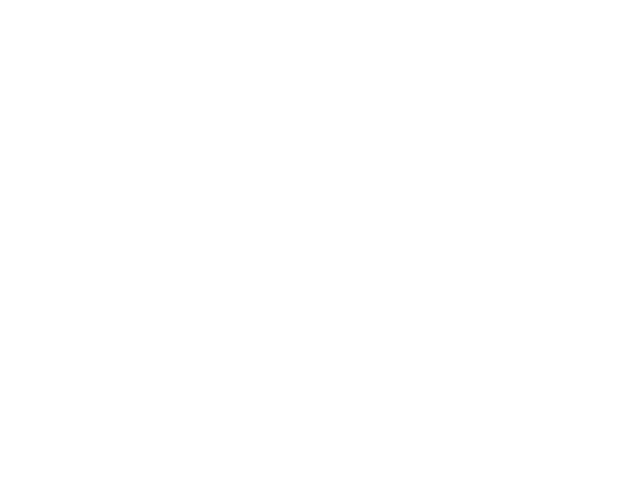

In [30]:
%matplotlib notebook
import matplotlib.pyplot as plt
h.PlotShape(False).plot(plt)
plt.show()

In [31]:
# But it is not a ball and stick. why?
# because NEURON does not diplay diameters
# this is useful when we need to see the structure of small dendrites

In [32]:
# But when using NEURON's built in graphics,
# We can use the 'show' method to show diameters

In [33]:
from neuron import gui

ps = h.PlotShape(True)

In [34]:
ps.show(0)

1.0

In [35]:
!pip install IPython 

In [36]:
from IPython.display import Image

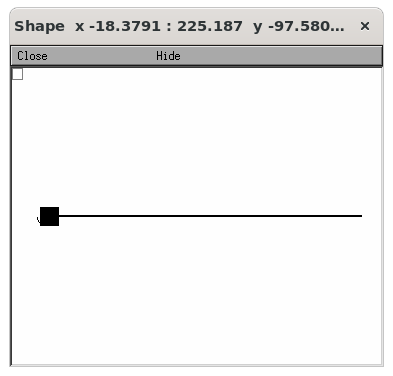

In [37]:
Image("Screenshot from 2023-07-10 09-13-31.png")

## Specify biophysics

In [38]:
# Now we need to set axial resistance and membrance capacitance
# because our cell need biophysical mechanisms in the membrane
# NEURON's default axial resistance is appropriate for squid but low for mammalian models

In [39]:
class BallAndStick:
    
    def __init__(self, gid):
        self._gid = gid
        self.soma = h.Section(name='soma', cell=self)
        self.dend = h.Section(name='dend', cell=self)
        
        # NEW
        # a list of all the sections in the cell
        # it helps us iterate over them to specify axial resistance and membrane capacitance
        # and also used for any other biophysics
        self.all = [self.soma, self.dend] 
        
        self.dend.connect(self.soma)
        self.soma.L = self.soma.diam = 12.6157
        self.dend.L = 200
        self.dend.diam = 1
        
        # NEW
        for sec in self.all: 
            sec.Ra = 100 # Axial resistance in Ohm * cm
            sec.cm = 1 # Membrane capacitance in micro Farads / cm^2
            
    def __repr__(self):
        return 'BallAndStick[{}]'.format(self._gid)

In [40]:
my_cell = BallAndStick(0)

In [41]:
class BallAndStick:
    
    def __init__(self, gid):
        self._gid = gid
        self._setup_morphology()
        self._setup_biophysics()
        
    def _setup_morphology(self):
        self.soma = h.Section(name='soma', cell=self)
        self.dend = h.Section(name='dend', cell=self)
        self.all = [self.soma, self.dend]
        self.dend.connect(self.soma)
        self.soma.L = self.soma.diam = 12.6157
        self.dend.L = 200
        self.dend.diam = 1
        
    def _setup_biophysics(self):
        for sec in self.all:
            sec.Ra = 100 # axial resistance
            sec.cm = 1 # membrane capacitance
            
    def __repr__(self):
        return 'BallAndStick[{}]'.format(self._gid)

In [42]:
my_cell = BallAndStick(0)

In [43]:
# now let's put Hodgkin-Huxley (hh) kinetics in the soma and specify some parameters

class BallAndStick():
    
    def __init__(self, gid):
        self._gid = gid
        self._setup_morphology()
        self._setup_biophysics()
        
    def _setup_morphology(self):
        self.soma = h.Section(name='soma', cell=self)
        self.dend = h.Section(name='dend', cell=self)
        self.all = [self.soma, self.dend]
        self.dend.connect(self.soma)
        self.soma.L = self.soma.diam = 12.6157
        self.dend.L = 200
        self.dend.diam = 1
        
    def _setup_biophysics(self):
        for sec in self.all:
            sec.Ra = 100
            sec.cm = 1
        
        # NEW
        self.soma.insert('hh')
        
        # NEW
        for seg in self.soma:
            seg.hh.gnabar = 0.12 # sodium conductance in S/cm2
            seg.hh.gkbar = 0.036 # potassium conductance in S/cm2
            seg.hh.gl = 0.0003 # leak conductance in S/cm2
            seg.hh.el = -54.3 # reversal potential in mV
            
    def __repr__(self):
        return 'BallAndStick[{}]'.format(self._gid)

In [44]:
my_cell = BallAndStick(0)

In [45]:
# Let's insert a passive(leak) current in the dendrite

class BallAndStick():
    
    def __init__(self, gid):
        self._gid = gid
        self._setup_morphology()
        self._setup_biophysics()
        
    def _setup_morphology(self):
        self.soma = h.Section(name='soma', cell=self)
        self.dend = h.Section(name='dend', cell=self)
        self.all = [self.soma, self.dend]
        self.dend.connect(self.soma)
        self.soma.L = self.soma.diam = 12.6157
        self.dend.L = 200
        self.dend.diam = 1
        
    def _setup_biophysics(self):
        for sec in self.all:
            sec.Ra = 100
            sec.cm = 1
        self.soma.insert('hh')
        for seg in self.soma:
            seg.hh.gnabar = 0.12 # sodium conductance in S/cm2
            seg.hh.gkbar = 0.036 # potassium conductance in S/cm2
            seg.hh.gl = 0.0003 # leak conductance in S/cm2
            seg.hh.el = -54.3 # reversal potential in mV
            
        # NEW
        self.dend.insert('pas')
        
        # NEW
        for seg in self.dend:
            seg.pas.g = 0.0001 # passive conductance
            seg.pas.e = -65 # leak reversal potential
            
    def __repr__(self):
        return 'BallAndStick[{}]'.format(self._gid)

In [46]:
my_cell = BallAndStick(0)

In [47]:
print(h.units('gnabar_hh'))

S/cm2


In [48]:
for sec in h.allsec():
    print("%s: %s" %(sec, ', '.join(sec.psection()['density_mechs'].keys())))

BallAndStick[0].soma: hh
BallAndStick[0].dend: pas


# Instrumentation

In [49]:
# now create our neuron
# Let's stimulate it and visualize its dynamics

## Stimulation

In [50]:
# We'll inject a current pulse into the distal (1) end of the dendrite 
# starting 5 ms after the simulation starts, with a duration of 1 ms, and an amplitude of 0.1 nA. 

In [51]:
# First, let's define and position the current clamp object
stim = h.IClamp(my_cell.dend(1))

In [52]:
# we can check the current clamp is inserted into
stim.get_segment()

BallAndStick[0].dend(1)

In [53]:
# we can check the 'dir' when we forgot the names of attributes
print(', '.join(item for item in dir(stim) if not item.startswith('__')))

amp, baseattr, delay, dur, get_loc, get_segment, has_loc, hname, hocobjptr, i, loc, same


In [54]:
# we have to set some parameters for a current clamp
stim.delay = 5
stim.dur = 1
stim.amp = 0.1

## Recording

In [55]:
# we will start out recording the membrane potential at the center of the soma and the time
soma_v = h.Vector().record(my_cell.soma(0.5)._ref_v)
t = h.Vector().record(h._ref_t)

# Run the simulation

In [56]:
# initialize membrane potential everywhere to -65mV
h.finitialize(-65 * mV)

1.0

In [57]:
# now we run until time 25ms
h.continuerun(25 * ms)

0.0

# Plot the results

In [58]:
pip install bokeh

Note: you may need to restart the kernel to use updated packages.


In [59]:
# we will initialize bokeh graphics
'''
from bokeh.io import output_notebook
import bokeh.plotting as plt
output_notebook()
'''

'\nfrom bokeh.io import output_notebook\nimport bokeh.plotting as plt\noutput_notebook()\n'

In [60]:
'''
f = plt.figure(x_axis_label='t (ms)', y_axis_label='v (mV)')
f.line(t, soma_v, line_width=2)
plt.show(f)
'''

"\nf = plt.figure(x_axis_label='t (ms)', y_axis_label='v (mV)')\nf.line(t, soma_v, line_width=2)\nplt.show(f)\n"

In [61]:
# you can see error
# so, we will use matplotlib

In [62]:
import matplotlib.pyplot as plt
import numpy as np

In [63]:
t = np.array(t)  # Convert the recorded vectors to NumPy arrays
soma_v = np.array(soma_v)

<IPython.core.display.Javascript object>


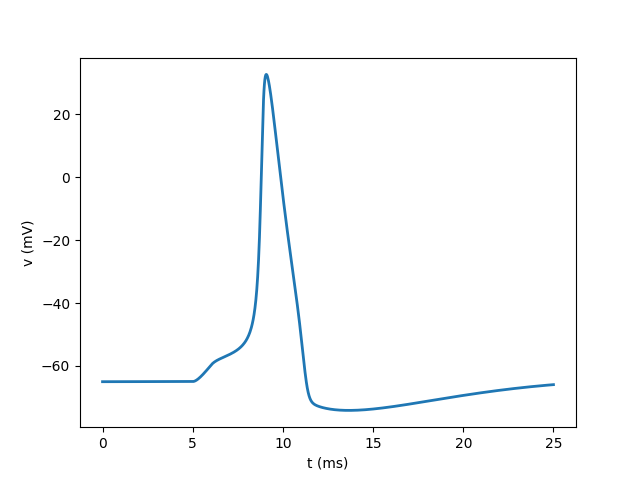

In [64]:
# Plotting using matplotlib
plt.figure()
plt.plot(t, soma_v, linewidth=2)
plt.xlabel('t (ms)')
plt.ylabel('v (mV)')
plt.show()

# Simulation studies

## Role of current amplitude

In [65]:
# set of simulations
# vary the amplitude of the current in a 'for' loop
'''
f = plt.figure(x_axis_label='t (ms)', y_axis_label='v (mV)')
amps = [0.075 * i for i in range(1, 5)]
colors = ['green', 'blue', 'red', 'black']

for amp, color in zip(amps, colors):
    stim.amp = amp
    h.finitialize(-65 * mV)
    h.continuerun(25 * ms)
    f.line(t, list(soma_v), line_width=2, legend_label='amp=%g' % amp, color=color)

plt.show(f)
'''

"\nf = plt.figure(x_axis_label='t (ms)', y_axis_label='v (mV)')\namps = [0.075 * i for i in range(1, 5)]\ncolors = ['green', 'blue', 'red', 'black']\n\nfor amp, color in zip(amps, colors):\n    stim.amp = amp\n    h.finitialize(-65 * mV)\n    h.continuerun(25 * ms)\n    f.line(t, list(soma_v), line_width=2, legend_label='amp=%g' % amp, color=color)\n\nplt.show(f)\n"

<IPython.core.display.Javascript object>


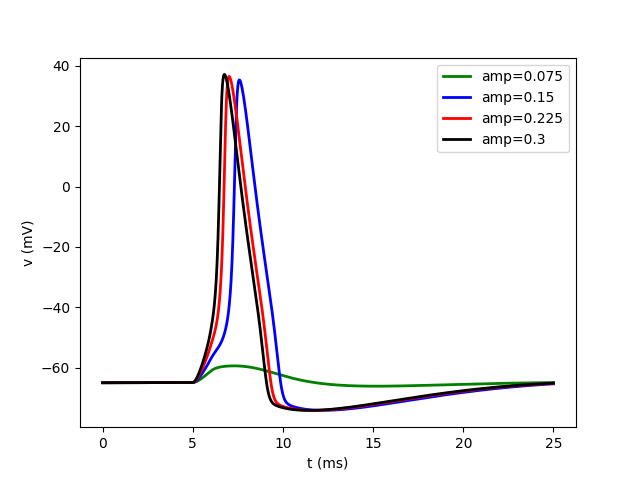

In [66]:
plt.figure()
plt.xlabel('t (ms)')
plt.ylabel('v (mV)')

amps = [0.075 * i for i in range(1, 5)]
colors = ['green', 'blue', 'red', 'black']
soma_v_list = []

for amp, color in zip(amps, colors):
    soma_v = h.Vector().record(my_cell.soma(0.5)._ref_v)
    stim.amp = amp
    h.finitialize(-65 * mV)
    h.continuerun(25 * ms)
    soma_v_list.append(np.array(soma_v))
    plt.plot(t, soma_v_list[-1], linewidth=2, label='amp=%g' % amp, color=color)

plt.legend()
plt.show()

## Plotting both the dendrite and the soma

In [67]:
# to plot the dendrite potential, we need to record it in a NEURON vector
dend_v = h.Vector().record(my_cell.dend(0.5)._ref_v)

In [68]:
plt.figure()
plt.xlabel('t (ms)')
plt.ylabel('v (mV)')

amps = [0.075 * i for i in range(1, 5)]
colors = ['green', 'blue', 'red', 'black']

for amp, color in zip(amps, colors):
    stim.amp = amp
    h.finitialize(-65 * mV)
    h.continuerun(25 * ms)
    plt.plot(t, soma_v, linewidth=2, label='amp=%g' % amp, color=color)
    plt.plot(t, dend_v, linewidth=2, linestyle='dashed', color=color)

plt.legend()
plt.show()

<IPython.core.display.Javascript object>

In [69]:
# At NEURON, all the voltage-gated channels that would depolarize the cell are only present in the soma.

## The role of nseg

In [70]:
# nseg = the number of segments of the dendrite, on the signal through the dendrite

<IPython.core.display.Javascript object>


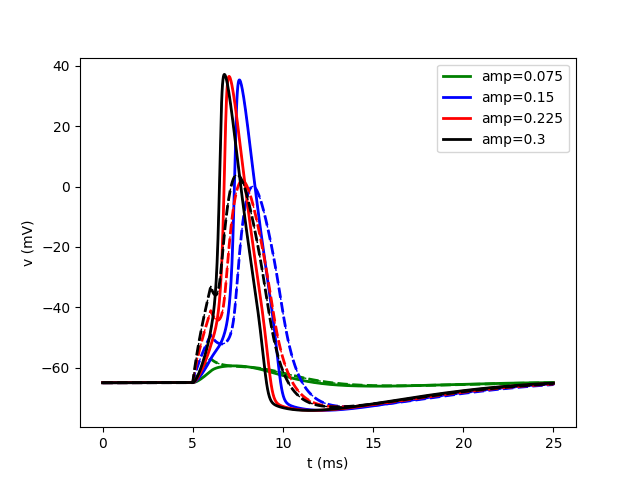

In [71]:
plt.figure()
plt.xlabel('t (ms)')
plt.ylabel('v (mV)')

amps = [0.075 * i for i in range(1, 5)]
colors = ['green', 'blue', 'red', 'black']

for amp, color in zip(amps, colors):
    stim.amp = amp
    
    for nseg, width in [(1, 2), (101, 1)]:
        h.finitialize(-65 * mV)
        h.continuerun(25 * ms)
        
        if nseg == 1:
            label = 'amp=%g' % amp
        else:
            label = None
        
        plt.plot(t, list(soma_v), linewidth=width, label=label, color=color)
        plt.plot(t, list(dend_v), linewidth=width, linestyle='dashed', color=color)

plt.legend()
plt.show()